In [1]:
import os
import time

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.version.VERSION)


2.7.0


In [2]:
new_model = tf.keras.models.load_model('models/mandelbrain-1638992942-perfect-0.9998')


Metal device set to: Apple M1


2021-12-09 09:23:28.158384: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-09 09:23:28.158823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
#new_model.summary()
@tf.function
def MandelbrotDataSet(size=1000, max_depth=100, xmin=-2.0, xmax=0.7, ymin=-1.3, ymax=1.3):
    x = tf.random.uniform((size,),xmin,xmax,tf.bfloat16)
    y = tf.random.uniform((size,),ymin,ymax,tf.bfloat16)
    return tf.stack([x, y], axis=1), mandel(x=x, y=y,max_depth=max_depth)

def mandel(x, y, max_depth):
    zx, zy = x,y
    for n in range(1, max_depth):
        zx, zy = zx*zx - zy*zy + x, 2*zx*zy + y
    return tf.cast(tf.less(zx*zx+zy*zy, 4.0),tf.float16) #* 2.0 - 1.0

class MandelSequence(tf.keras.utils.Sequence):
    def __init__(self, batch_size, batch_per_seq):
        self.batch_size = batch_size
        self.batch_per_seq = batch_per_seq
    def __len__(self):
        return self.batch_per_seq
    def __getitem__(self, item):
        return MandelbrotDataSet(self.batch_size)

In [4]:
x = tf.random.uniform((200_000,), -2.0, 0.7, tf.float16)
y = tf.random.uniform((200_000,), -1.3, 1.3, tf.float16)
#x = tf.random.uniform((100_000,), -12.0, 10.7, tf.float16)
#y = tf.random.uniform((100_000,), -11.3, 11.3, tf.float16)
data = tf.stack([x, y], axis=1)
ev = MandelSequence(100_000,100)
results = new_model.evaluate(ev)
print("test loss, test acc:", results)

2021-12-09 09:23:28.776011: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-12-09 09:23:28.776821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-09 09:23:28.985511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 20s 200ms/step - loss: 2.4880e-04 - accuracy: 0.9998 - mae: 2.5318e-04 - mse: 2.4880e-04
test loss, test acc: [0.0002488017489667982, 0.9997512102127075, 0.0002531810023356229, 0.00024880171986296773]


In [5]:
start = time.time()
predictions = new_model.predict(data)
print("elaspsed : ", time.time() - start)

2021-12-09 09:23:49.219114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


elaspsed :  22.311036109924316


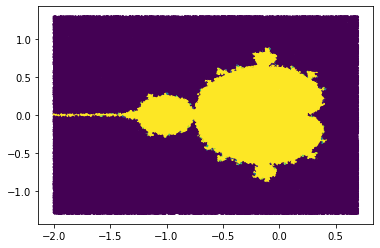

In [6]:
plot = plt.scatter(x, y, s=1, c=predictions)
plt.show()